<a href="https://colab.research.google.com/github/ChikoAbillaBasya/PCVK25_3G_09/blob/main/Week06_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM FILTER**
---

1. Buat fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

# **Konvolusi tanpa Library**
---
**Membuat fungsi konvolusi**

Fungsi konvolusi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride / besarnya pergeseran untuk setiap konvolusi,
4. nilai pad yang akan ditambahkan pada citra

In [ ]:
[] def convolution2d(image, kernel, stride, padding):

In [ ]:
def convolution2d(image, kernel, stride, padding):
  # Ukuran citra
  h, w = image.shape
  # Ukuran kernel
  kh, kw = kernel.shape

  # Tambahkan padding
  if padding > 0:
      padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
  else:
      padded = image

  # Hitung ukuran output
  oh = (h + 2 * padding - kh) // stride + 1
  ow = (w + 2 * padding - kw) // stride + 1

  # Buat citra output
  output = np.zeros((oh, ow), dtype=np.float32)

  # Proses konvolusi manual
  for i in range(0, oh):
          for j in range(0, ow):
              # ambil region sesuai kernel
              region = padded[i*stride:i*stride+kh, j*stride:j*stride+kw]
              # kalikan dan jumlahkan
              value = np.sum(region * kernel)
              output[i, j] = value

  # Normalisasi agar nilai tetap 0..255
  output = np.clip(output, 0, 255).astype(np.uint8)

  return output

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

**Load Image yang akan diproses**

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK25_3G_09/Gambar/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

**Menentukan kernel yang akan digunakan**

In [ ]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

**Memanggil fungsi konvolusi dan menerapkan setiap filter yang telah ditentukan**

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255,   0, ..., 255, 255,   0],
       [  0, 255, 179, ..., 249, 218,   0],
       ...,
       [  0, 255, 255, ..., 159, 183,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
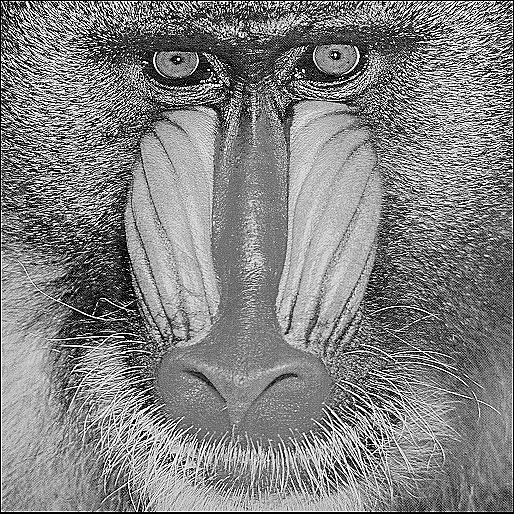

In [ ]:
convolution2d(img_gray,kernel_sharpen,1,2)

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

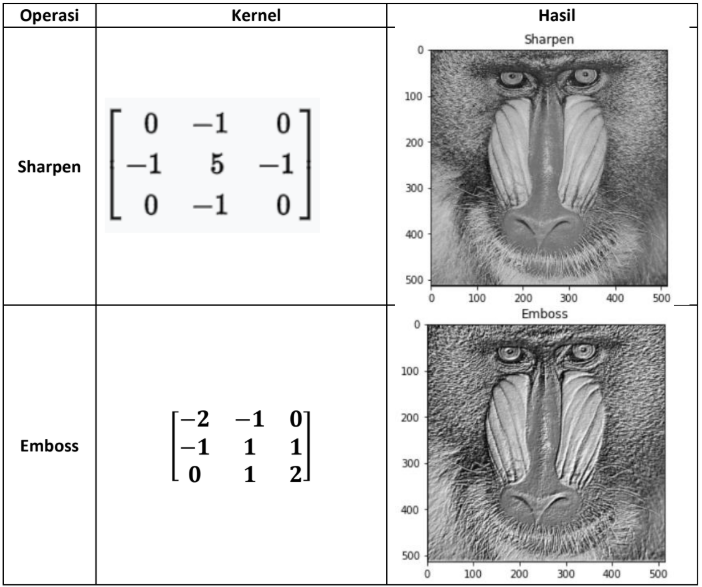
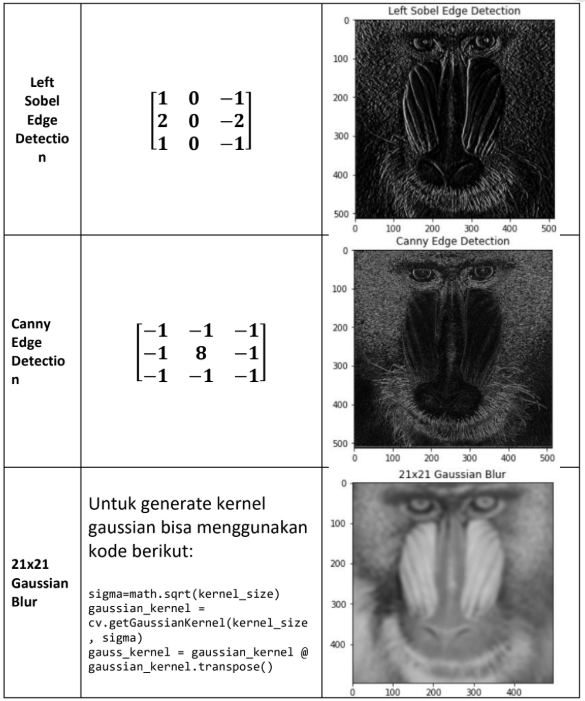

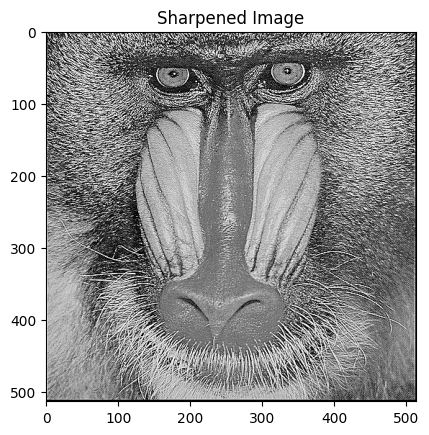

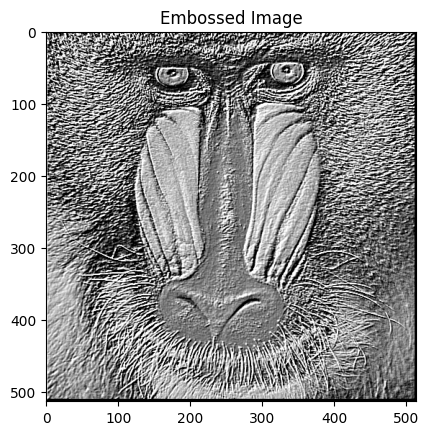

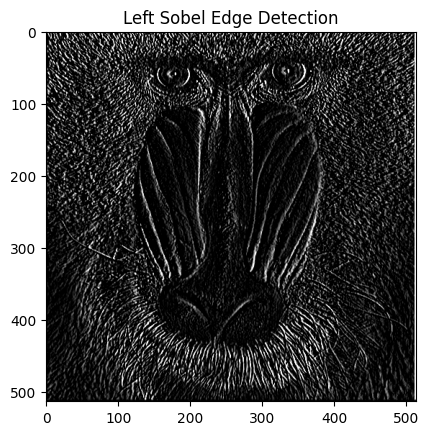

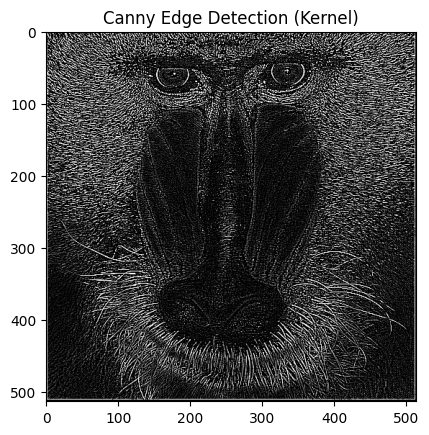

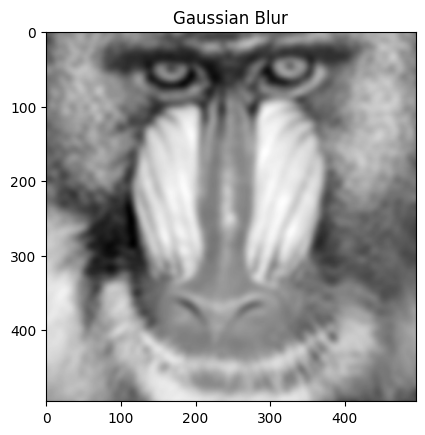

In [ ]:
# Kernel sharpen
kernel_sharpen = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
], dtype=float)

kernel_emboss = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2]
], dtype=float)

kernel_leftSobel = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
], dtype=float)

kernel_cannyEdge = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
], dtype=float)

# Kernel gaussian 21x21
kernel_size = 21
sigma = math.sqrt(kernel_size)
ax = np.linspace(-(kernel_size-1)/2., (kernel_size-1)/2., kernel_size)
xx, yy = np.meshgrid(ax, ax)
kernel_gaussian = np.exp(-0.5 * (xx**2 + yy**2) / (sigma**2))
kernel_gaussian = kernel_gaussian / np.sum(kernel_gaussian)

otp_sharpened = convolution2d(img_gray, kernel_sharpen, 1,2)
otp_emboss = convolution2d(img_gray, kernel_emboss, 1,2)
otp_leftSobel = convolution2d(img_gray, kernel_leftSobel, 1,2)
otp_cannyEdge = convolution2d(img_gray, kernel_cannyEdge, 1,2)
otp_gaussian = convolution2d(img_gray, kernel_gaussian, 1,2)

# Display results using matplotlib
images = [otp_sharpened, otp_emboss, otp_leftSobel, otp_cannyEdge, otp_gaussian]
titles = ['Sharpened Image', 'Embossed Image', 'Left Sobel Edge Detection', 'Canny Edge Detection (Kernel)', 'Gaussian Blur']

for i in range(len(images)):
    plt.figure()
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.show()

**FILTER LIBRARY DAN FILTER MODERN**
---
Pada beberapa percobaan berikut ini kita akan melihat beberapa filter menggunakan library, filter
modern yang digunakan pada CNN, filter modern dengan kombinasi beberapa filter tradisional (tanpa
Deep Learning).

**Percobaan 1:**

Pada percobaan 1 ini, kita akan membuat Filter Gaussian, Sharpen, dan Canny menggunakan library
filter2d dari OpenCV. Filter ini akan kita terapkan pada Image RGB. Pada bagian awal kode terdapat
fungsi show_side_by_side yang digunakan untuk menampilkan gambar secara berdampingan.

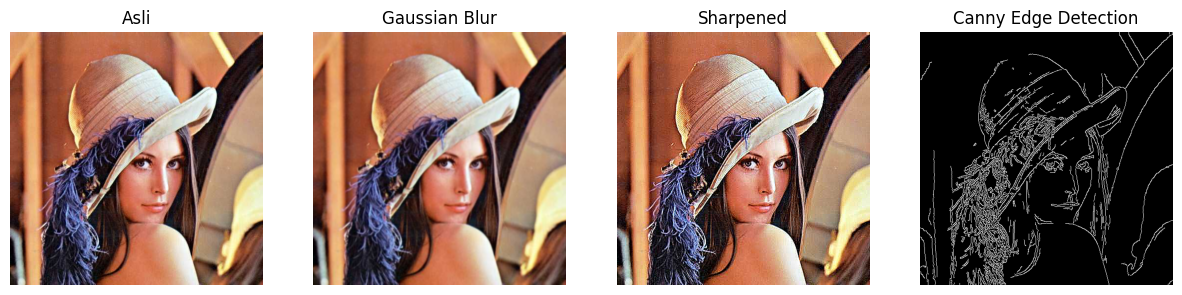

In [ ]:
# Fungsi tampil berdampingan
def show_side_by_side(images, titles, figsize=(15,5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i+1)
            plt.imshow(img, cmap="gray")
        else:  #color
            plt.subplot(1, len(images), i+1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

img = cv.imread("/content/drive/MyDrive/PCVK25_3G_09/Gambar/lena.jpg")
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

blur = cv.GaussianBlur(img, (7,7), 1)
edges = cv.Canny(cv.cvtColor(img, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
sharpened = cv.filter2D(img, -1, sharpen_kernel)
show_side_by_side([img, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])

**Percobaan 2:**

Pada percobaan 2 berikut ini akan dilakukan filtering modern dari Library OpenCV. Dua filter yang akan
digunakan adalah Bilateral Filtering dan Guided Filter. **Bilateral filtering** adalah sebuah metode
penyaringan non-linear yang banyak digunakan untuk menghaluskan citra sekaligus tetap
mempertahankan ketajaman tepi. Berbeda dengan Gaussian blur biasa yang hanya memperhitungkan
jarak spasial antar piksel, bilateral filter juga mempertimbangkan perbedaan intensitas warna. Dengan
cara ini, piksel-piksel yang letaknya dekat dan memiliki warna mirip dengan pusat jendela akan
mendapat bobot lebih besar dalam perhitungan, sedangkan piksel dengan perbedaan warna kontras
(misalnya di sisi tepi) akan tereduksi pengaruhnya. Akibatnya, citra menjadi lebih halus pada area
datar, namun garis batas dan detail penting tetap terjaga. Meskipun menghasilkan kualitas yang baik,
bilateral filter tergolong lambat karena perhitungan bobot yang cukup kompleks. Dalam praktiknya,
filter ini banyak dipakai untuk keperluan seperti perbaikan kualitas foto, pengurangan noise, maupun
sebagai dasar dari efek beauty *filter* untuk melembutkan tekstur kulit tanpa mengaburkan kontur
wajah. **Guided filtering** merupakan teknik yang lebih modern dan efisien. Filter ini didasarkan pada asumsi
bahwa, dalam sebuah jendela lokal, hasil penyaringan dapat direpresentasikan sebagai fungsi linear
dari citra pemandu (*guide image*). Artinya, setiap piksel keluaran dihitung dengan mempertimbangkan
hubungan linier antara nilai piksel di citra masukan dengan nilai piksel pada citra pemandu. Jika citra
masukan dan citra pemandu sama, guided filter akan berperan mirip bilateral filter namun dengan
perhitungan yang jauh lebih cepat dan hasil yang lebih halus. Keunggulan lainnya, guided filter bisa
menggunakan citra yang berbeda sebagai pemandu sehingga mampu mengarahkan proses filtering
sesuai kebutuhan. Berkat sifat ini, guided filter sering dipakai dalam berbagai aplikasi lanjutan seperti
*HDR tone mapping*, peningkatan detail, *image matting, feathering*, serta pemurnian *depth map* pada
sistem stereo vision. Secara umum, guided filter menawarkan keseimbangan antara preservasi tepi
yang baik, kualitas visual yang halus, dan efisiensi komputasi, sehingga dianggap sebagai
penyempurnaan dari pendekatan bilateral filtering.

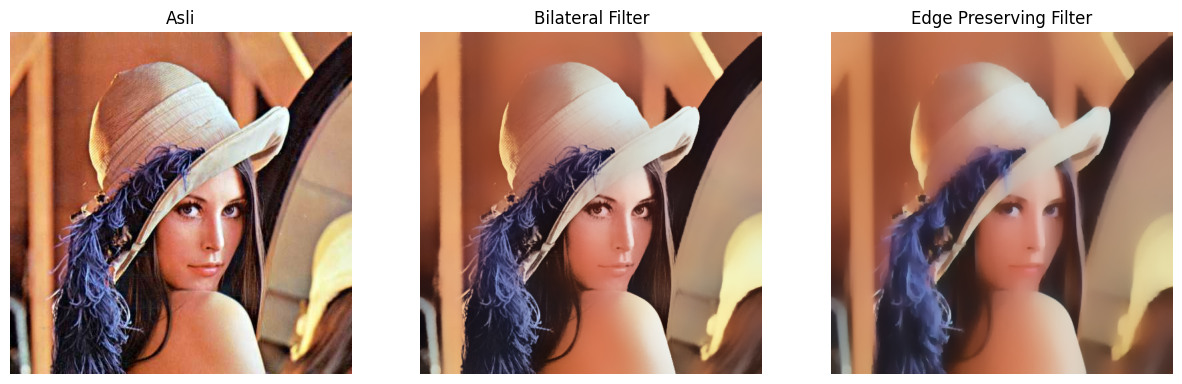

In [ ]:
# Filter Modern dari OpenCV
# Bilateral Filter (edge-preserving)
bilateral = cv.bilateralFilter(img, 50, 100, 100)

# Edge Preserving Filter (alternatif Guided filter)
edge_preserve = cv.edgePreservingFilter(img, flags=1, sigma_s=100, sigma_r=0.9)

show_side_by_side([img, bilateral, edge_preserve],
                  ["Asli", "Bilateral Filter", "Edge Preserving Filter"])

**Percobaan 3:**

Percobaan kali ini akan mencoba melihat proses Filtering pada CNN (bagian Feature Map), lakukan
running code beberapa kali dan perhatikan hasil outputnya. Apa yang dapat kamu simpulkan dari hasil
keluaran tersebut.

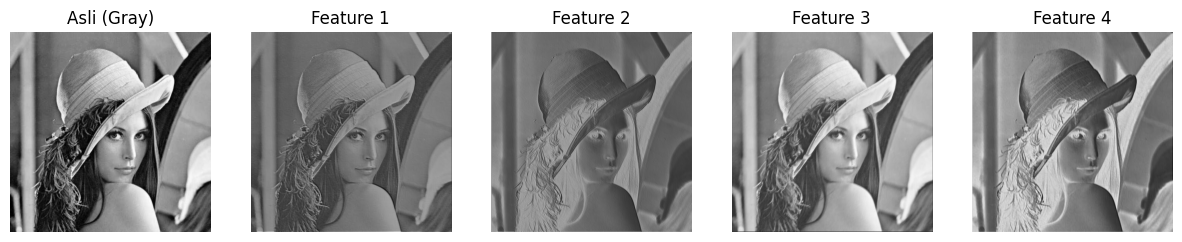

In [ ]:
# Filter Feature Map yang digunakan pada CNN, Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)

model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0,i].numpy() for i in range(features.shape[1])]
show_side_by_side([img_gray] + feature_maps, ["Asli (Gray)"] + [f"Feature {i+1}" for i in range(len(feature_maps))])

**Percobaan 4:**

Percobaan kali ini akan melakukan efek Beauty dan Vintage yang biasanya digunakan pada Aplikasi
popular saat ini. Filter yang digunakan merupakan kombinasi dari filter tradisional. Perlu diketahui
untuk filter aplikasi popular bisa jadi tidak menggunakan metode yang sama. Pada Aplikasi popular
bisa jadi menggunakan model GenAI dengan data Training untuk memberikan hasil yang lebih akurat.

Text(0.5, 1.0, 'Old/Vintage Filter')

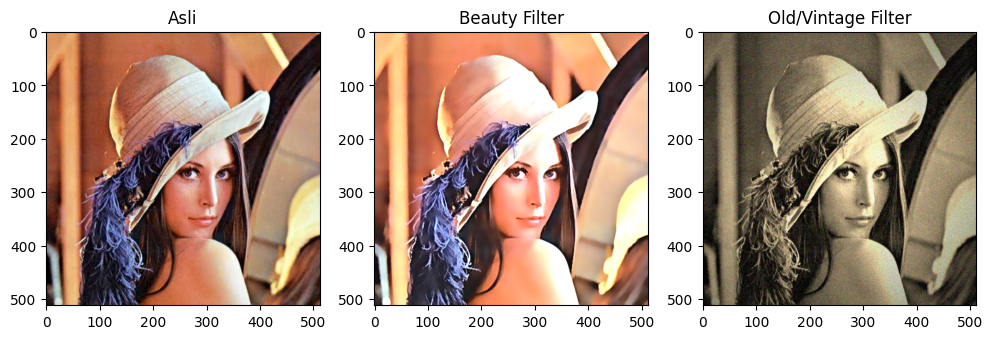

In [ ]:
# ======================
# 1. Beauty Filter
# ======================

# Step 1 : Smoothing kulit dengan bilateral filter
smooth = cv.bilateralFilter(img, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2 : Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0, 0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3 : Brightness & contrast
alpha = 1.2   # contrast
beta = 15     # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# ======================
# 2. Old/Vintage Filter
# ======================

# Step 1 : Sepia tone
sepia_kernel = np.array([[0.272, 0.534, 0.131],
                         [0.349, 0.686, 0.168],
                         [0.393, 0.769, 0.189]])
sepia = cv.transform(img, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2 : Vignette
rows, cols = img.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols*0.6)
kernel_y = cv.getGaussianKernel(rows, rows*0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()
vignette = np.copy(sepia)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask

# Step 3 : Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Asli")

plt.subplot(1,3,2)
plt.imshow(cv.cvtColor(beauty, cv.COLOR_BGR2RGB))
plt.title("Beauty Filter")

plt.subplot(1,3,3)
plt.imshow(cv.cvtColor(old_img, cv.COLOR_BGR2RGB))
plt.title("Old/Vintage Filter")

**Percobaan 5:**

Percobaan 5 akan menunjukkan pada anda filter anime / cartoon menggunakan kombinasi filter
tradisional.

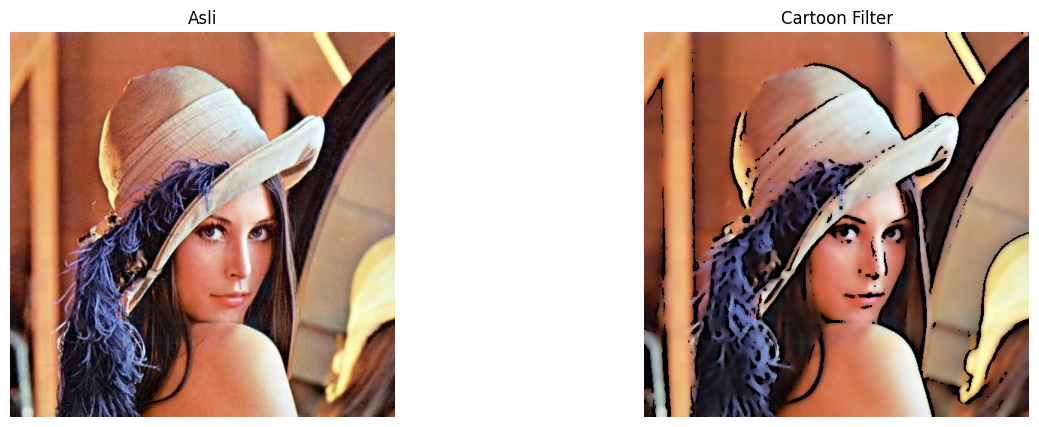

In [ ]:
# Filter Anime / Cartoon
# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi lebih halus)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur(gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255,
                             cv.ADAPTIVE_THRESH_MEAN_C,
                             cv.THRESH_BINARY, 9, 9)

# Step 2: Bilateral Filter untuk smoothing warna
color = cv.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)

# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)

# Tampilkan
show_side_by_side([img, cartoon], ["Asli", "Cartoon Filter"])

**Percobaan 6:**

Pada Percobaan 6 akan ditunjukkan contoh Filter Malam.

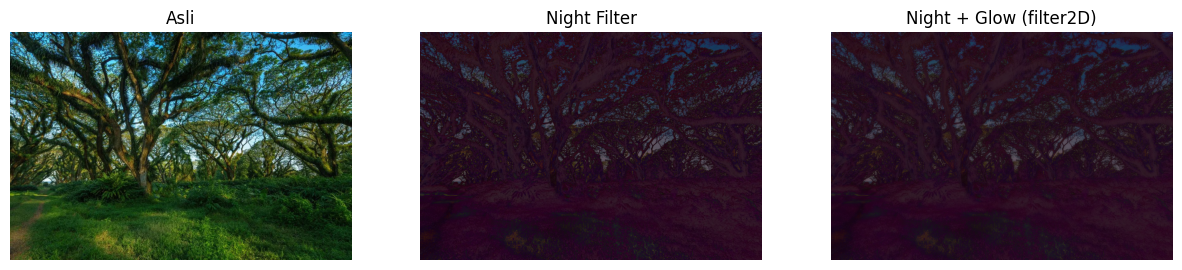

In [ ]:
# Night Filter
img = cv.imread("/content/drive/MyDrive/PCVK25_3G_09/Gambar/djawatan.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Step 1: Gelapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img, alpha=0.6, beta=-40)

# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100))  # BGR
night = cv.addWeighted(night, 0.8, blue_tint, 0.2, 0)

# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones((15, 15), np.float32) / 225
glow = cv.filter2D(night, -1, kernel)

# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)

# Tampilkan
show_side_by_side([img, night, night_glow],
                  ["Asli", "Night Filter", "Night + Glow (filter2D)"])

**Percobaan 7**

Percobaan 7 menunjukkan Filter Pagi dan Pagi ditambahkan efek kabut.

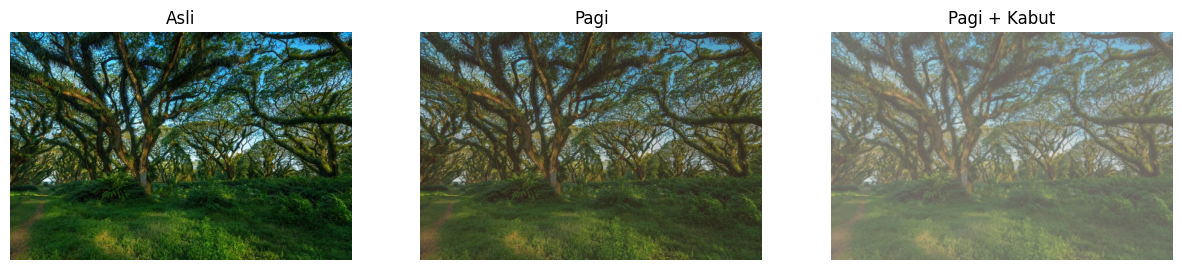

In [ ]:
# Filter Suasana Pagi dan Kabut
# ==============================
# Step 1: Kurangi kontras & cerahkan
# ==============================
alpha = 0.9 # contrast
beta = 20 # brightness
soft = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

# ==============================
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# ==============================
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)

# ==============================
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# ==============================
# Kernel blur Gaussian-like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)

# tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)

show_side_by_side([img, pagi, kabut],
                  ["Asli", "Pagi", "Pagi + Kabut"])